# <center><span style="color:#2C786C">프로젝트 : 가위바위보 분류기 만들기</span></center>

오늘 배운 내용을 바탕으로 가위바위보 분류기를 만들도록 하겠습니다. 가장 먼저 해야 할 일은 뭘까요? 네, 첫 번째!!!! 데이터를 준비해야 합니다. 가위바위보 이미지를 모아 놓은 곳은 없으므로, 우리가 직접 사진을 찍어서 모아봅시다.

## <span style="color:#F7B400">순서</span>
> **<span style="color:#2C786C">Step 1. 데이터를 준비하자</span>**<br>
**<span style="color:#2C786C">Step 2. 딥러닝 네트워크 설계하기</span>**<br>
**<span style="color:#2C786C">Step 3. 딥러닝 네트워크 학습시키기</span>**<br>
**<span style="color:#2C786C">Step 4. 얼마나 잘 만들었는지 확인하기(테스트)</span>**<br>
**<span style="color:#2C786C">Step 5. 더 좋은 네트워크 만들어보기</span>**<br>
**<span style="color:#2C786C">Step 6. 노드를 마치며...</span>**<br>
**<span style="color:#2C786C">Step 7. 루브릭 평가</span>**<br>
**<span style="color:#2C786C">Step 8. 회고</span>**

### <span style="color:#926DD6">참고</span>
>* **<span style="color:#DD94B9">토닥토닥 파이썬 - 이미지를 위한 딥러닝 (텐서플로우 v1)(wikidocs) :** [네이버 영화 리뷰 감성 분류하기(Naver Movie Review Sentiment Analysis)](https://wikidocs.net/63061)

### <span style="color:#926DD6">용어 정리</span>
> **<span style="color:#492569">✓ 텐서플로우(TensorFlow)란?**
>* 가장 널리 사용되고 있는 머신러닝 라이브러리 중 하나
>* 구글(Google)에서 오픈소스로 제공, 대부분의 딥러닝 구현실습은 Tensorflow 버전 2.0(=TF 2.0, 혹은 그 이상)에서 진행될 예정!

> <span style="color:#492569">**✓ Matplotlib이란?**</span>
>* 파이썬에서 제공하는 시각화(Visualization) 패키지
>* 차트(chart), 플롯(plot) 등 다양한 형태로 데이터를 시각화할 수 있는 강력한 기능을 제공
>* 참고 : [Matplotlib활용사례 보기](https://matplotlib.org/2.0.2/gallery.html)

> **<span style="color:#492569">✓ data set이란?**</span>
>* 자료의 모임
>* 참고 : [데이터셋 이야기](https://tykimos.github.io/2017/03/25/Dataset_and_Fit_Talk/)

## 어떻게 만들까?

일반적으로 딥러닝 기술은 **"데이터 준비 → 딥러닝 네트워크 설계 → 학습 → 테스트(평가)"** 의 순서대로 만들게 되는데 이 과정을 따라 만들어 보겠습니다.
그렇다면 가장 먼저 해야 할 일은 뭘까요?  
**네, 첫 번째!!!! 데이터를 준비해야 합니다.**

## <span style="color:#124445">Step 1. 데이터를 준비하자</span>
---
### 데이터 만들기

(1) 우리는 노트북 전면 카메라를 활용하여 가위, 바위, 보 이미지 각 100장을 만들어 볼거예요. 그런데 300장을 어느 세월에 만들까요?

![](https://aiffelstaticprd.blob.core.windows.net/media/images/E-1-8.max-800x600.png)

걱정하지 마세요. 구글의 teachable machine 사이트에서 쉽게 데이터를 만들어볼 수 있습니다. 아래 사이트에서 Get Started 버튼을 눌러보세요. 그 다음, Image Project를 선택하면 Webcam을 구동해 클래스별 이미지 데이터를 직접 촬영해서 만들 수 있는 멋진 화면이 나타납니다.
* https://teachablemachine.withgoogle.com/

(2) 먼저 가위 이미지 데이터를 만들어 봅시다. 웹캠 앞에 가위 포즈를 취하면서 버튼을 누르면 이미지가 캡쳐됩니다. 딥러닝 모델이 인식하기 좋게끔 여러분들 손이 잘 보이게 찍어주세요.

* 여러 각도에서 찍어보세요.
* 여러 크기로 찍어보세요.
* 혼자하면 다양한 각도와 크기를 저장할 수 없으니, 옆 동료와 함께 하세요.
* 좋은 데이터가 좋은 결과를 낳는다는 것을 꼭 기억하세요.


![](https://aiffelstaticprd.blob.core.windows.net/media/images/E-1-9.max-800x600.png)

주의] 만약 웹캠 사용 버튼을 눌렀을 때 아래 화면처럼 에러가 난다면, 브라우저에서 웹캠을 사용할 수 있는 권한을 허용해 주어야 합니다.

![](https://aiffelstaticprd.blob.core.windows.net/media/images/E-1-10.max-800x600.png)

(3) 100장의 가위 이미지를 캡쳐했다면, 우상단의 메뉴 아이콘을 눌러 다운로드 합니다.

![](https://aiffelstaticprd.blob.core.windows.net/media/original_images/E-1-11.png)

(4) 가위 이미지 100장을 모두 저장 했다면, 바위 및 보 이미지에 대해서도 위 과정을 진행하세요. 가위는 scissor 폴더에, 바위는 rock 폴더에, 보는 paper 폴더에 각각 압축을 풀어 봅시다. 각 폴더안에 100개의 이미지가 들어있다면 성공!!

추후 프로그램 작성의 통일성을 위해, rock_scissor_paper 라는 폴더 아래에 scissor, rock, paper 폴더를 만들어서 이미지를 저장합시다. 각 이미지는 아래 폴더 안에 들어가야 합니다.

### 디렉토리 만들기

본인의 환경에 따라 실습용 디렉토리 rock_scissor_paper 및 하위 디렉토리를 만들어 주세요.

In [1]:
# 저는 터미널로 설치했습니다.

# mkdir -p ~/aiffel/rock_scissor_paper/scissor
# mkdir -p ~/aiffel/rock_scissor_paper/rock
# mkdir -p ~/aiffel/rock_scissor_paper/paper 

# ls -l ~/aiffel/rock_scissor_paper

### 데이터 불러오기 + Resize 하기

가위, 바위, 보 이미지를 28x28로 만들어야 합니다. 이를 위해서는 PIL 라이브러리를 사용해볼 건데 혹시 PIL 라이브러리가 없는 경우 필요한 패키지를 설치해 주세요.

In [2]:
# pip install pillow   # PIL 라이브러리가 설치되어 있지 않다면 설치

from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


이제 가위, 바위, 보 이미지를 불러와서 28x28 사이즈로 변경할 겁니다. 아래 코드를 실행하여 이미지의 크기를 28x28 로 바꾸겠습니다.

In [3]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다. (데이터 전처리)
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/scissor
가위 이미지 resize 완료!


In [4]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")
    
print("바위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/rock
바위 이미지 resize 완료!


In [5]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")
    
print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/paper
보 이미지 resize 완료!


load_data() 함수는 입력으로 이미지가 있는 폴더 위치를 받습니다.  
여기서는 **rock_scissor_paper** 폴더 위치를 적어주면 됩니다.  
가위바위보의 경우 3개의 클래스 즉, 가위: 0, 바위: 1, 보: 2 로 라벨링이 될 것입니다.

In [6]:
import tensorflow as tf
import numpy as np

def load_data(img_path, name):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32) # 임폴트한 numpy 사용

    idx=0
    for file in glob.iglob(img_path+'/scissor/*'): # *는 jpg, jpeg 모두 불러오기
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터({})의 이미지 개수는 {}입니다.".format(name,idx))
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path, "x_train")

x_train_norm = x_train/255.0   # 255로 나눠서 정규화
# y_train_norm = y_train # 이미지가 아닌 x_train_norm에 대한 라벨이 들어가 있으므로 주석처리

print("x_train shape: {}".format(x_train.shape)) # 실제 이미지가 들어있음
print("y_train shape: {}".format(y_train.shape)) # 실제 이미지에 대한 라벨이 들어있음

학습데이터(x_train)의 이미지 개수는 300입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


한 번 이미지를 불러 볼까요?

라벨:  0


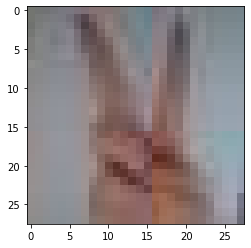

In [7]:
import matplotlib.pyplot as plt # matplotlib : 시각화 기능을 제공하는 라이브러리

plt.imshow(x_train[0]) # 파이썬은 0번부터 수가 부여되므로 0이 첫번째!
print('라벨: ', y_train[0])

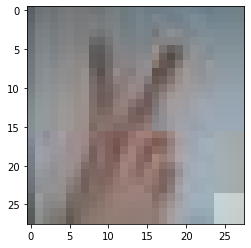

In [8]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

## 2. 딥러닝 네트위크 설계하기

자 이제 준비가 끝났습니다. 이제 가위바위보를 인식하는 딥러닝 네트워크를 설계해 볼까요?  
텐서플로우 케라스(tf.keras)에서 Sequential API라는 방법을 사용할 겁니다.  
Sequential API는 개발의 자유도는 많이 떨어지지만, 매우 간단하게 딥러닝 모델을 만들어낼 수 있는 방법입니다.

In [9]:
from tensorflow import keras

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


input_shape=(28, 28, 3)에서 1은 흑백, 3은 컬러 이미지(RGB)를 뜻합니다.  
맨 아래 layers.Dense의 3은 클래스 수(가위, 바위, 보)를 의미합니다.

In [10]:
model.summary() # 만든 딥러닝 네트워크 모델 확인

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9

## 3. 딥러닝 네트워크 학습시키기

잘 설계가 되었다면, 이제 학습을 시켜볼까요?  
아마도 직접 만든 데이터는 거의 비슷비슷할 것이기 때문에 accuracy가 꽤 높게 나올 것입니다.

In [11]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
# print("Before Reshape - y_train_norm shape: {}".format(y_train_norm.shape))

x_train_reshaped=x_train_norm.reshape(-1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
# y_train_reshaped=y_train_norm.reshape(-1, 28, 28, 3)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
# print("After Reshape - y_train_reshaped shape: {}".format(y_train_reshaped.shape))

Before Reshape - x_train_norm shape: (300, 28, 28, 3)
After Reshape - x_train_reshaped shape: (300, 28, 28, 3)


주석 해제시 NameError: name 'y_train_norm' is not defined 에러가 났습니다.  
데이터 준비하기에서 y_train_norm 선언을 해보았지만 오류가 반복됩니다.
아마 x_train_norm은 이미지인데 y_train_norm은 이미지가 아닌 학습시킨 이미지에 라벨번호를 부여하기 때문에 오류가 나는 것 같아 주석처리 해주었습니다.

In [12]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 0s 2ms/step - loss: 1.0982 - accuracy: 0.4132
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0773 - accuracy: 0.6403
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0413 - accuracy: 0.9023
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.9864 - accuracy: 0.7323
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.9258 - accuracy: 0.7368
Epoch 6/10
10/10 [==============================] - 0s 2ms/step - loss: 0.8241 - accuracy: 0.7998
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.6707 - accuracy: 0.9452
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.4896 - accuracy: 0.9383
Epoch 9/10
10/10 [==============================] - 0s 2ms/step - loss: 0.3761 - accuracy: 0.9302
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2492 - accuracy: 0.9983


## 4. 얼마나 잘 만들었는지 확인하기(테스트)

자 그럼 300장의 가위바위보 이미지를 만들어 모두 학습에 사용했습니다.  
그러므로 테스트 데이터가 없죠. 다른사람이 만든 새로운 데이터가 필요합니다. 저는 조원의 이미지 데이터 300장을 받아왔습니다.  
그리고 그것을 테스트 데이터로 하여 test accuracy를 측정해보겠습니다.

우선 테스트용 데이터인 **x_test, y_test**를 만들어 봅시다.

In [13]:
image_dir_path = os.getenv("HOME") + "/aiffel/test_set"
(x_test, y_test)=load_data(image_dir_path, "x_test")

x_test_norm = x_test/255.0   # 정규화
y_test_norm = y_test

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

print("Before Reshape - x_test _norm shape: {}".format(x_test_norm.shape))

x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.

print("After Reshape - x_test _reshaped shape: {}".format(x_test_reshaped.shape))
print("-----------------------------------------------------------------------------------------------")

# compile : 모델을 학습시키기 위한 학습과정을 설정
# metrics : accuracy로 설정 시 정확도를 알 수 있다.
model.compile(optimizer='adam', # 최적화, optimizer='adam' : 거의 기본옵션처럼 쓰임
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_test_reshaped, y_test, epochs=10)

test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss)) # 손실율 계산
print("test_accuracy: {}".format(test_accuracy)) # 정확도 계산

학습데이터(x_test)의 이미지 개수는 300입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)
Before Reshape - x_test _norm shape: (300, 28, 28, 3)
After Reshape - x_test _reshaped shape: (300, 28, 28, 3)
-----------------------------------------------------------------------------------------------
Epoch 1/10
10/10 [==============================] - 0s 3ms/step - loss: 1.2191 - accuracy: 0.4357
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 0.9770 - accuracy: 0.5377
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.9518 - accuracy: 0.5818
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.8863 - accuracy: 0.6765
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.8772 - accuracy: 0.6624
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.8137 - accuracy: 0.6342
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.7701 - accuracy: 0.7456
Epoch 8/10
10/10 [======

음..정확도가 생각보다 높게 나오네요. 그래도 좀 더 성능을 높이기 위해 다른 동기들의 데이터를 받아옵니다. 전처리 되지 않은게 있다면 1번과 마찬가지로 데이터전처리를 해주고 다시 측정해 봅시다.

## 5. 최종학습 및 테스트

In [14]:
def load_data(img_path, name): # 재선언, 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=14700   # 가위바위보 이미지 개수 총합변경
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32) # 임폴트한 numpy 사용

    idx=0
    for file in glob.iglob(img_path+'/scissor/*'): # *는 jpg, jpeg 모두 불러오기
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터({})의 이미지 개수는 {}입니다.".format(name,idx))
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/train_set"
(x_train, y_train)=load_data(image_dir_path, "train")

x_train_norm = x_train/255.0   # 255로 나눠서 정규화
# y_train_norm = y_train # 이미지가 아닌 x_train_norm에 대한 라벨이 들어가 있으므로 주석처리

print("x_train shape: {}".format(x_train.shape)) # 실제 이미지가 들어있음
print("y_train shape: {}".format(y_train.shape)) # 실제 이미지에 대한 라벨이 들어있음

학습데이터(train)의 이미지 개수는 14700입니다.
x_train shape: (14700, 28, 28, 3)
y_train shape: (14700,)


In [15]:
#바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10 # 횟수

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_3 (Dense)              (

In [16]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
# print("Before Reshape - y_train_norm shape: {}".format(y_train_norm.shape))

x_train_reshaped=x_train_norm.reshape(-1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
# y_train_reshaped=y_train_norm.reshape(-1, 28, 28, 3)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
# print("After Reshape - y_train_reshaped shape: {}".format(y_train_reshaped.shape))

Before Reshape - x_train_norm shape: (14700, 28, 28, 3)
After Reshape - x_train_reshaped shape: (14700, 28, 28, 3)


In [17]:
# compile : 모델을 학습시키기 위한 학습과정을 설정
# metrics : accuracy로 설정 시 정확도를 알 수 있다.
model.compile(optimizer='adam', # 최적화, 거의 기본옵션처럼 쓰임
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

Epoch 1/10
460/460 [==============================] - 1s 3ms/step - loss: 1.0092 - accuracy: 0.4664
Epoch 2/10
460/460 [==============================] - 1s 2ms/step - loss: 0.6135 - accuracy: 0.7472
Epoch 3/10
460/460 [==============================] - 1s 3ms/step - loss: 0.4107 - accuracy: 0.8443
Epoch 4/10
460/460 [==============================] - 1s 3ms/step - loss: 0.2955 - accuracy: 0.8927
Epoch 5/10
460/460 [==============================] - 1s 3ms/step - loss: 0.2150 - accuracy: 0.9282
Epoch 6/10
460/460 [==============================] - 1s 3ms/step - loss: 0.1734 - accuracy: 0.9394
Epoch 7/10
460/460 [==============================] - 1s 3ms/step - loss: 0.1211 - accuracy: 0.9621
Epoch 8/10
460/460 [==============================] - 1s 3ms/step - loss: 0.0921 - accuracy: 0.9715
Epoch 9/10
460/460 [==============================] - 1s 3ms/step - loss: 0.0823 - accuracy: 0.9764
Epoch 10/10
460/460 [==============================] - 1s 3ms/step - loss: 0.0587 - accuracy: 0.9819

In [18]:
def load_data(img_path, name): # 재선언, 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300   # 가위바위보 이미지 개수 총합변경
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32) # 임폴트한 numpy 사용

    idx=0
    for file in glob.iglob(img_path+'/scissor/*'): # *는 jpg, jpeg 모두 불러오기
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터({})의 이미지 개수는 {}입니다.".format(name,idx))
    return imgs, labels

In [19]:
image_dir_path = os.getenv("HOME") + "/aiffel/test_set_L"

(x_test, y_test)=load_data(image_dir_path, "x_test")
x_test_norm = x_test/255.0   # 정규화
y_test_norm = y_test

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

print("Before Reshape - x_test _norm shape: {}".format(x_test_norm.shape))

x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.

print("After Reshape - x_test _reshaped shape: {}".format(x_test_reshaped.shape))

# compile : 모델을 학습시키기 위한 학습과정을 설정
# metrics : accuracy로 설정 시 정확도를 알 수 있다.
model.compile(optimizer='adam', # 최적화, 거의 기본옵션처럼 쓰임
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_test_reshaped, y_test, epochs=10)

print("test_loss: {} ".format(test_loss)) # 손실율 계산
print("test_accuracy: {}".format(test_accuracy)) # 정확도 계산

학습데이터(x_test)의 이미지 개수는 300입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)
Before Reshape - x_test _norm shape: (300, 28, 28, 3)
After Reshape - x_test _reshaped shape: (300, 28, 28, 3)
Epoch 1/10
10/10 [==============================] - 0s 3ms/step - loss: 0.9630 - accuracy: 0.8193
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1844 - accuracy: 0.9532
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1259 - accuracy: 0.9579
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0497 - accuracy: 0.9914
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0217 - accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 1.0000
Epoch 9/10
10/10 [====

위에서 이미 사용했기 때문에 새로운 테스트 셋 파일을 만들어 테스트 합니다.

In [20]:
# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss)) # 손실률
print("test_accuracy: {}".format(test_accuracy)) # 정확도

10/10 - 0s - loss: 0.0042 - accuracy: 1.0000
test_loss: 0.0041976505890488625 
test_accuracy: 1.0


결과는 사실 잘 모르겠지만 잘 나왔다(?) 로스값이 낮으니 맞겠죠...? 일단 시간이 없는 관계로 제출합니다. 퍼실님과 조원님들 덕분에 사진 정리도 했더니 정확도가 높게 나온 것 같습니다.

## 총평

노드 진행 할 때는 이해 했다고 생각했는데 과제 제출을 위해 직접 처음부터 해보니 아니었습니다.    
첫번째 과제라 쉬운 걸로 주셨을텐데 퍼실님들 조언대로 잠시 시간을 가져보기도 하고 드러누워도 봤는데도 힘들어서 2주의 시간이었다면 2번의 주말이 있었을테니 좀 더 시간이 있어서 좋았을텐데 하는 생각이 들었습니다.  

이미지를 28X28로 줄이면서 이걸 과연 얘가 구분해 낼 수 있을까? 했는데 생각보다 컴퓨터는 가르쳐주면 진짜 잘 하는데 내가 잘 못 알려줬던거구나 싶어서 슬펐습니다...